# Usando PyROOT
Root tiene gran cantidad de clases específicamente diseñadas para el análisis y manipulación de dátos. 

Ejemplos y los constructores completos en 
https://root.cern.ch/doc/v622/

## TCanvas: Clase Canvas (lienzo).

Un lienzo es un área asignada a una ventana.

Un Canvas se puede subdividir en áreas gráficas independientes estos son los lamados __Pads__. Un lienzo tiene un `pad` predeterminada que tiene el nombre del lienzo en sí. Por el momento usaremos los Canvas por defecto de ROOT, que se llaman en el momento en que se use el atributo `Draw()` sobre un objeto ROOT adecuado.

## TF1: Clase Función 1-Dimención

Un objeto TF1 es una función 1-Dim definida entre un límite superior e inferior. La función puede ser una función simple basada en una expresión TFormula o una función de usuario precompilada. La función puede tener parámetros asociados. 

Se pueden crear los siguientes tipos de funciones:

1. Expresión usando la variable x y sin parámetros
2. Expresión usando la variable x con parámetros
3. Hay varios tipos más que se pueden acceder desde C++.

### Ejemplos:

#### 1. Expresión usando la variable x y sin parámetros.

    __Caso 1:__ Expresión en línea usando funciones de C++

In [1]:
#Debemos llamar las diferentes clases que vamos a usar:
# TCanvas para tener donde dibujar
# TF1 Funciones en una dimención
from ROOT import TCanvas, TF1

Welcome to JupyROOT 6.22/03


In [2]:
# Creamos un objeto de la clase TF1 llamado fun1
fun1 =  TF1("fun1","sin(x)/x",0,10)
# Se puede evaluar 
print("Valor de sin(2)/2=",fun1(2))

Valor de sin(2)/2= 0.45464871341284085


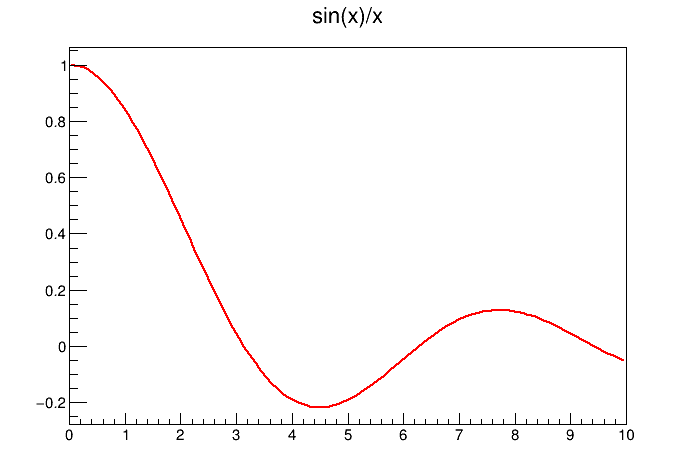

In [3]:
#Ahora se crea un Canvas para dibujar la función
c1 = TCanvas( 'c1', 'Ejemplo1', 200, 10, 700, 500 )
# Para dibujar la función se usa el atributo Draw() para dibujarla en el Canvas
fun1.Draw()
# Y se usa Draw sobre el canvas para visualizarlo
c1.Draw()

__Caso 2:__ usando una función ROOT (por ejemplo, de TMath)

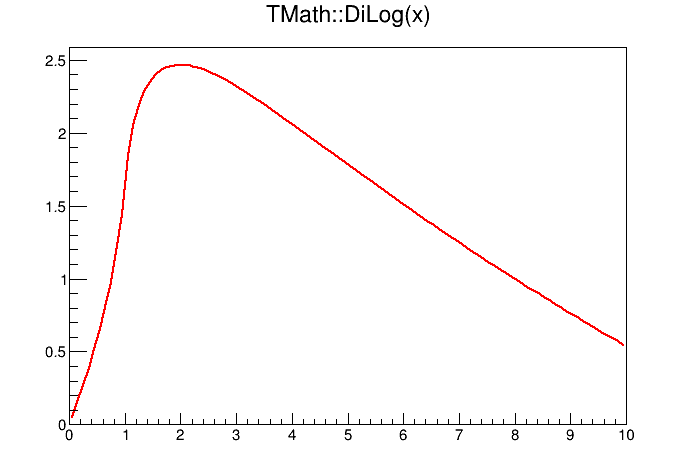

In [4]:
#Debemos llamar las diferentes clases que vamos a usar:
# TCanvas para tener donde dibujar
# TF1 Funciones en una dimención
from ROOT import TCanvas, TF1
# Creamos un objeto de la clase TF1
fun2 =  TF1("fun2","TMath::DiLog(x)",0,10)
#Ahora se crea un Canvas para dibujar la función
c2 = TCanvas( 'c2', 'Ejemplo2', 200, 10, 700, 500 )
# Para dibujar la función se usa el atributo Draw() para dibujarla en el Canvas
fun2.Draw()
# Y se usa Draw sobre el canvas para visualizarlo
c2.Draw()

#### 2. Expresión usando la variable x con parámetros

__Caso 1:__ expresión usando funciones de C ++

In [5]:
from ROOT import TCanvas, TF1
#Definimos una función con tres parametros [0], [1] y [2] 
fun_p1 = TF1("fun_p1","[0]*exp(-0.5*((x-[1])/[2])**2)",-6,7)
#Los parámetros deben inicializarse mediante:
fun_p1.SetParameter(0,2)
fun_p1.SetParameter(1,1)
fun_p1.SetParameter(2,2)
#A los parámetros se les puede dar un nombre:
fun_p1.SetParName(0,"Norma")
fun_p1.SetParName(1,"Media")
fun_p1.SetParName(2,"varianza")
#Y se puede evaluar
print("Gaussiana(2)= ",fun_p1(2))

Gaussiana(2)=  1.764993805169191


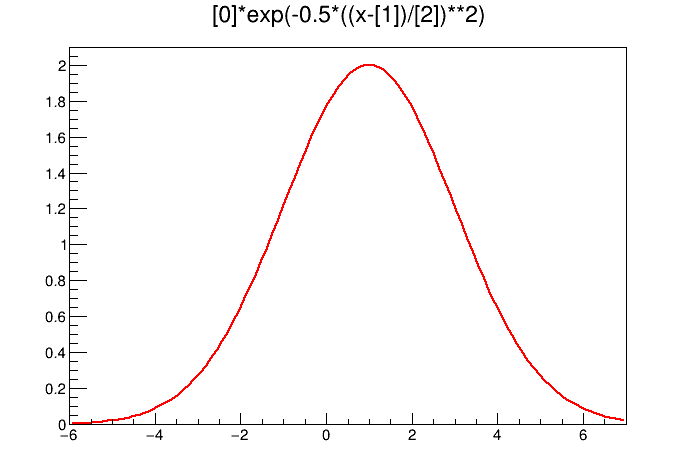

In [6]:
#Ahora se crea un Canvas para dibujar la función
c3 = TCanvas( 'c3', 'Ejemplo3', 200, 10, 700, 500 )
fun_p1.Draw()
c3.Draw()

__Caso 2:__ usando funciones TMath con parámetros

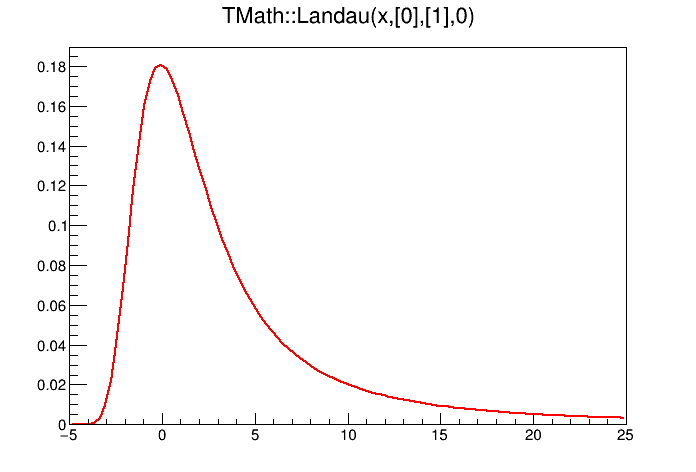

In [7]:
from ROOT import TCanvas, TF1
#Definimos una función con dos parametros [0] y [1] 
fun_p2 = TF1("fun_p2","TMath::Landau(x,[0],[1],0)",-5,25);
fun_p2.SetParameters(0.2,1.3);
#Dibujamos
fun_p2.Draw();
#Usemos el mismo canvas anterior
c3.Draw()

## TFormula
`TFormula` almacena expresiones matemáticas y pueden ser luego evaluadas usando `TF1`

__Ejemplos:__

In [8]:
from ROOT import TCanvas, TFormula, TF1
form1 = TFormula( 'form1', 'sqrt(abs(x))' )
#Y se evaluan con el método Eval 
print(form1.Eval( -45 ))

6.708203932499369


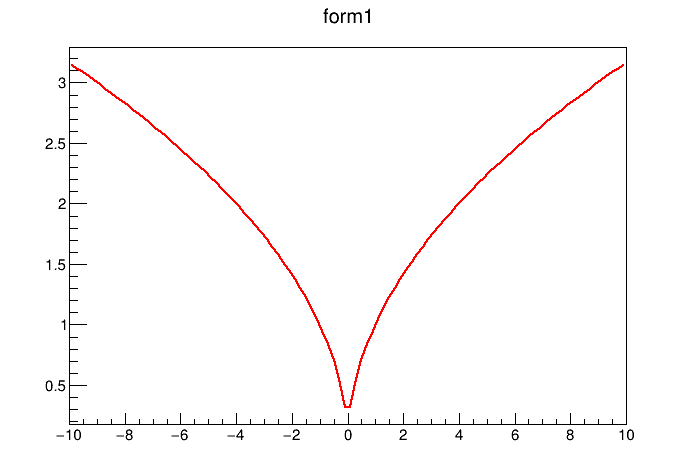

In [9]:
#Usando el TF1 se puede graficar
fun3 = TF1( 'fun3', "form1", -10, 10 )
#Dibujamos
fun3.Draw()
#Usemos el mismo canvas anterior
c3.Draw()

## TGraph y TGraphErrors

Para mostrar las datos en archivos en ROOT, incluidos los errores, existe una clase TGraph y TGraphErrors con diferentes tipos de constructores. 

__Ejemplo:__ usamos datos de los archivos `ExampleData*.txt` en formato de texto

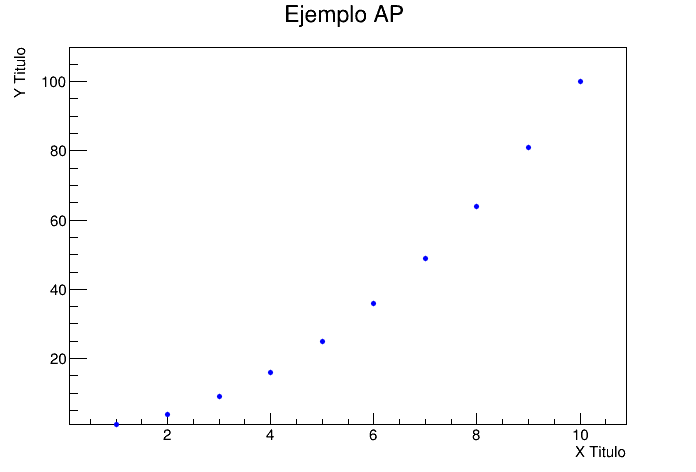

In [10]:
from ROOT import TCanvas, TF1, TGraph
# Creamos un objeto Grafica desde el archivo ExampleDataNoError.txt
gr1 = TGraph("ExampleDataNoError.txt")
#Utilizamos algunas de las opciones para TGraph
gr1.SetMarkerColor(4)
gr1.SetMarkerSize(0.5)
gr1.SetMarkerStyle(20)
gr1.SetTitle("Ejemplo AP ")
gr1.GetXaxis().SetTitle("X Titulo")
gr1.GetYaxis().SetTitle("Y Titulo")
   
# Ahora se crea un Canvas para dibujar la función
c4 = TCanvas( 'c4', 'Ejemplo', 200, 10, 700, 500 )
# Graficamos los datos, usando la opcion CP 
gr1.Draw("AP")
# Mostramos el canvas
c4.Draw()

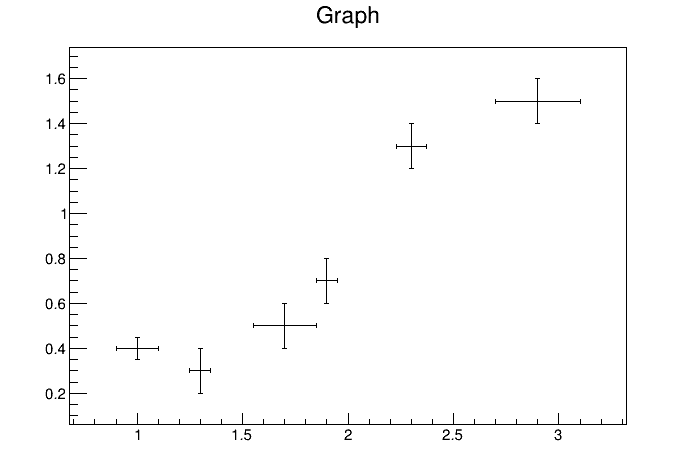

In [11]:
from ROOT import TCanvas, TF1, TGraphErrors
# Creamos un objeto Grafica desde el archivo ExampleDataNoError.txt
gr2 = TGraphErrors("ExampleDataError.txt")
# Borremos el Canvas para dibujar la función
c4.Clear()
# Graficamos los datos, usando la opcion "AP"
gr2.Draw("AP")
# Mostramos el canvas
c4.Draw()

## TH1 Histogramas
Las distribuciones de frecuencia en ROOT son manejadas por un conjunto de clases derivadas de la clase de histograma TH1. Nosotros usaremos `TH1F` o `TH1D`, donde las letra _F_ y _D_ significa "flotante" y "flotante double", lo que significa que el tipo de datos flotante se utiliza para almacenar las entradas en un contenedor de histograma.

__Ejemplo:__

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


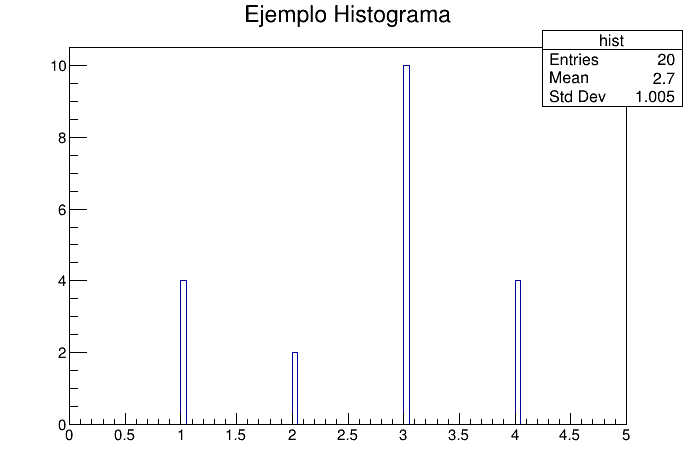

In [16]:
from ROOT import TCanvas, TF1, TH1F
import random
#Usemos las funciones ya definidas para crear un Histograma
hist = TH1F("hist","Ejemplo Histograma",100,0.,5.)
#Ahora llenamos el histograma de forma aleatoria
for i in range( 20 ):
    #Llenamos los histogramas
    hist.Fill( random.randrange(1,5))
# Borremos el Canvas para dibujar la función
c4.Clear()
#Ahora lo dibujamos
hist.Draw('H')
#Y mostramos el canvas
c4.Draw()